In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

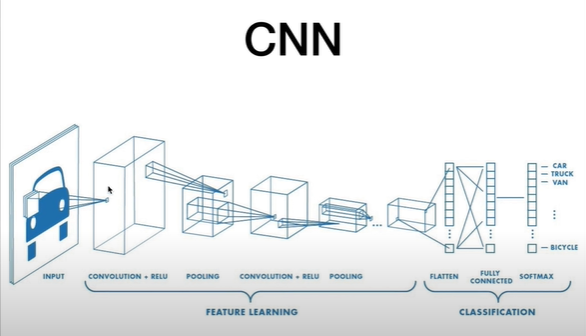

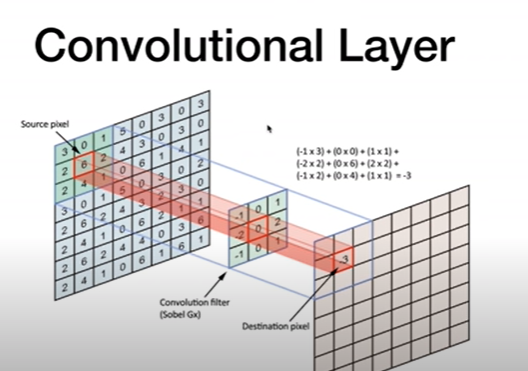

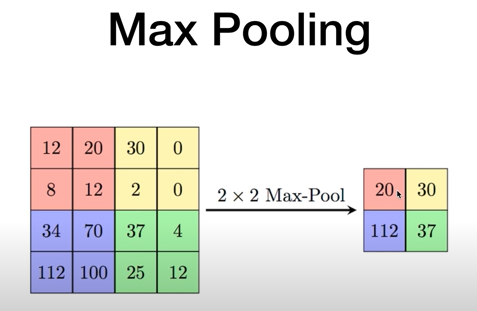

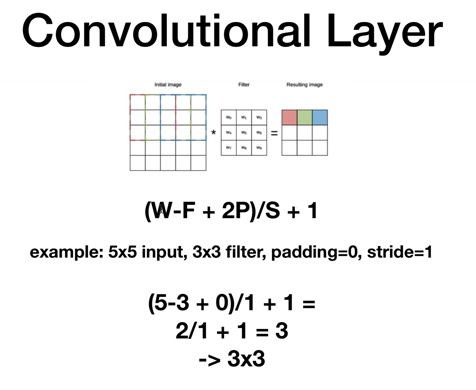

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 72877752.18it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data


In [8]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


Files already downloaded and verified


In [9]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

In [10]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [12]:
examples = iter(train_loader)
images, labels = next(examples)
images.shape, labels.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


In [15]:
model = ConvNet().to(device)
model

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
total_batch = len(train_loader)
total_batch

12500

In [18]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_batch}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [2000/12500], Loss: 2.2741
Epoch [1/5], Step [4000/12500], Loss: 2.2959
Epoch [1/5], Step [6000/12500], Loss: 2.2711
Epoch [1/5], Step [8000/12500], Loss: 2.3176
Epoch [1/5], Step [10000/12500], Loss: 2.2193
Epoch [1/5], Step [12000/12500], Loss: 2.3057
Epoch [2/5], Step [2000/12500], Loss: 2.3510
Epoch [2/5], Step [4000/12500], Loss: 1.7639
Epoch [2/5], Step [6000/12500], Loss: 2.1309
Epoch [2/5], Step [8000/12500], Loss: 2.1736
Epoch [2/5], Step [10000/12500], Loss: 2.1658
Epoch [2/5], Step [12000/12500], Loss: 1.8266
Epoch [3/5], Step [2000/12500], Loss: 2.1468
Epoch [3/5], Step [4000/12500], Loss: 1.7934
Epoch [3/5], Step [6000/12500], Loss: 2.3180
Epoch [3/5], Step [8000/12500], Loss: 2.8458
Epoch [3/5], Step [10000/12500], Loss: 1.1609
Epoch [3/5], Step [12000/12500], Loss: 1.8583
Epoch [4/5], Step [2000/12500], Loss: 1.6278
Epoch [4/5], Step [4000/12500], Loss: 1.2311
Epoch [4/5], Step [6000/12500], Loss: 1.2045
Epoch [4/5], Step [8000/12500], Loss: 1.4183
Epoc

In [19]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')


Accuracy of the network: 48.88 %
